<a href="https://colab.research.google.com/github/avigangarde/Cap-III-Health-Insurance-Cross-Sell-Prediction/blob/main/Cap_III_Health_Insurance_Cross_sell_prediction_Avinash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Supervised ML - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Avinash B Gangarde ( Data Science Traine at Almabetter )


# **Project Summary -**

This is the second project in the category of supervised machine learning, in the  type of classification. "Health insurance cross sell prediction" is the project name. By predicting whether or not a customer will be interested in purchasing insurance, we will assist the insurance firm. Insurance companies hold all the information about their clients who have health insurance. The business is now attempting to cross-sell customers vehicle insurance. So, we need to identify the client who will purchase vehicle insurance from the specified insurance provider.

Let's break this down a little more in terms of a business context. Our client is an insurance company that has previously offered health insurance to its clients. Now, they need our assistance in developing a model to determine whether the policyholders' clients from the prior year will also be interested in the company's provision of vehicle insurance. A policy of insurance is an agreement whereby a business agrees to guarantee reimbursement for a specific loss, damage, disease, or death in exchange for the payment of a specific premium.

Vehicle insurance works similarly to medical insurance in that customers must pay an annual premium to the insurance provider firm in order for them to be compensated (referred to as Sum assured) in the event that their car is involved in an unfortunate accident.

Using a model to determine whether a consumer would be interested in vehicle insurance is very beneficial for the business since it allows it to plan its marketing strategy to reach out to those customers and maximise its business model and revenue.

So, we have information on demographics (gender, age, region code type), vehicles (car age, damage), policies (premium, sourcing channel), etc. to determine whether a customer would be interested in purchasing vehicle insurance.

So first we  do data preprocessing and then  feature selection and then we  build some kind of classification model. and try to compare different evaluation metrics and find out which model performs well.


# **GitHub Link -** 

[Health Insurance Cross sell prediction](https://github.com/avigangarde/Cap-III-Health-Insurance-Cross-Sell-Prediction/blob/main/Cap_III_Health_Insurance_Cross_sell_prediction_Avinash.ipynb)

# **Problem Statement**


Predict whether or not clients who already have policies with the specified insurance provider are inclined to purchase vehicle  insurance. which customers the organisation should concentrate on for cross-selling.

#### **Business Objective**

The business wants to cross-sell its vehicle insurance product as another type of insurance. If the current clients of the company purchase their auto insurance, this will boost overall company profit.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBRFClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install scikit-learn
import sklearn
!pip install missingno
import missingno as msno
!pip install shap

!pip install scikit-plot
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the file from google drive
df=pd.read_csv('/content/drive/MyDrive/ML capstone csv /TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns', None)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

In [ ]:
# No of rows and columns are present in dataset
rows=df.shape[0]
columns=df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 381109
Number of columns in dataset are 12


In [ ]:
# check the number of columns in the dataset
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
#  Get count duplicates multiple columns 
duplicate=df.duplicated().sum()
duplicate

0

In [ ]:
# generate a table of those culprit rows which are duplicated:
dups = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:'count'})

# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [ ]:
Complete_columns_info(df)

 selected dataframe has 12 columns and 381109 rows


,No of Null Values,% of null values,No of unique values,Data Type
id,0,0.0,381109,int64
Gender,0,0.0,2,object
Age,0,0.0,66,int64
Driving_License,0,0.0,2,int64
Region_Code,0,0.0,53,float64
Previously_Insured,0,0.0,2,int64
Vehicle_Age,0,0.0,3,object
Vehicle_Damage,0,0.0,2,object
Annual_Premium,0,0.0,48838,float64
Policy_Sales_Channel,0,0.0,155,float64


<AxesSubplot:>

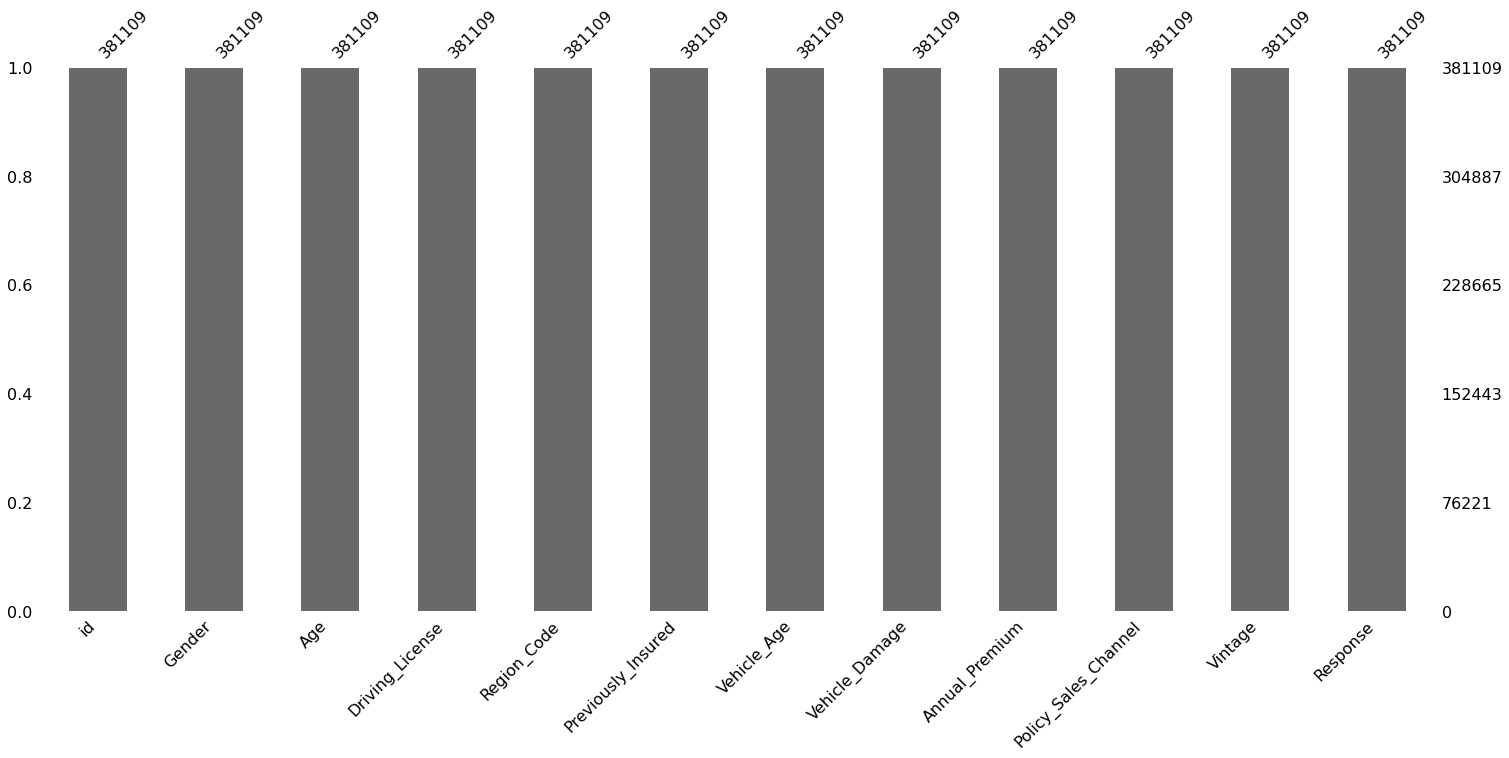

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

1] We have 3 categorical and 9 numerical features in the dataset.

2] We have total  381109 rows and 12 columns.

3] We have no missing values present in our dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Variables Description 


 1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

id
[     1      2      3 ... 381107 381108 381109]


Gender
['Male' 'Female']


Age
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]


Driving_License
[1 0]


Region_Code
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]


Previously_Insured
[0 1]


Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']


Vehicle_Damage
['Yes' 'No']


Annual_Premium
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]


Policy_Sales_Channel
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# check whether there are any outliers in any columns .
# lets define first numerical columns
numerical_col= df.select_dtypes(include=np.number).columns.tolist()
numerical_col

['id',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

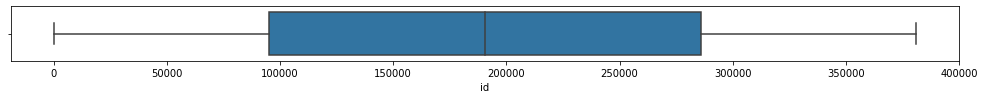

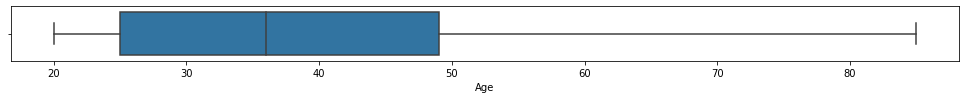

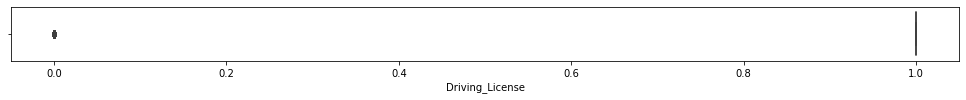

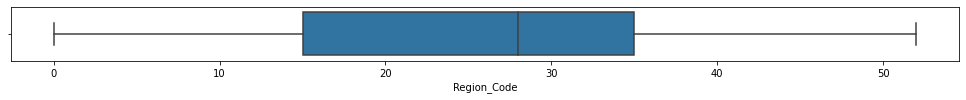

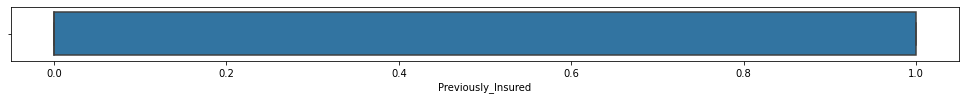

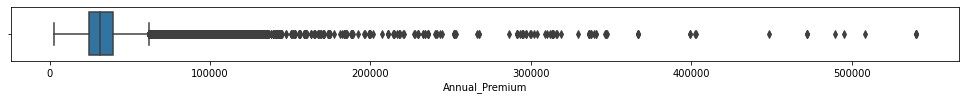

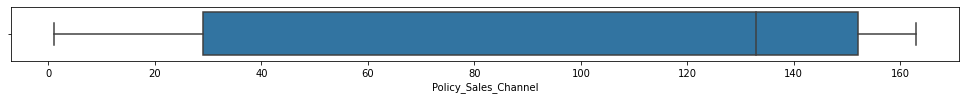

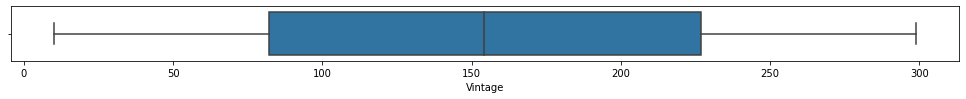

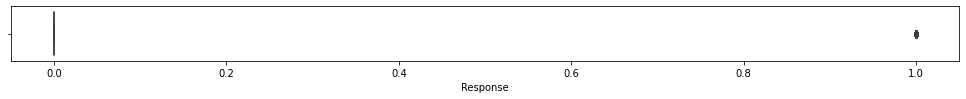

In [ ]:
# plotting the boxplot for each variable.
for column in numerical_col:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

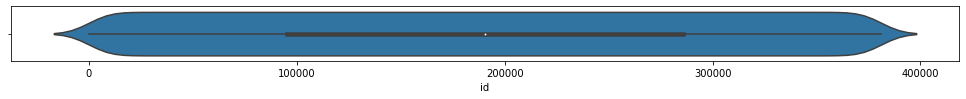

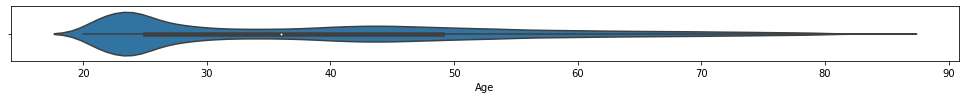

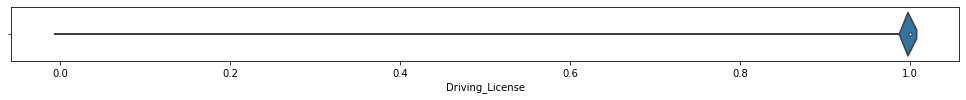

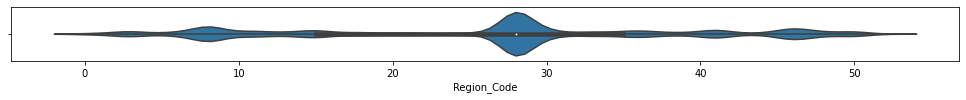

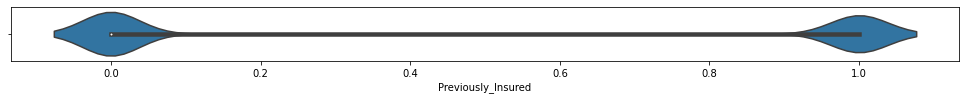

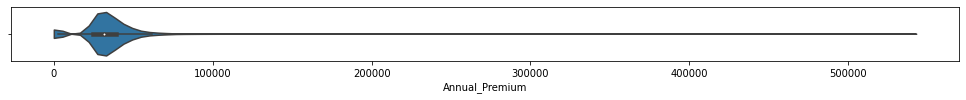

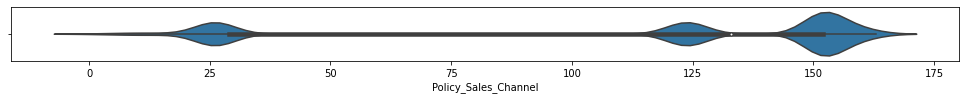

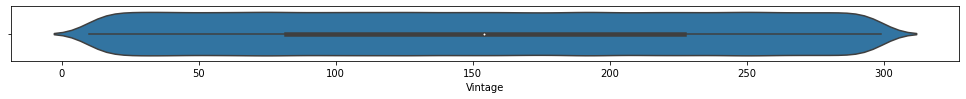

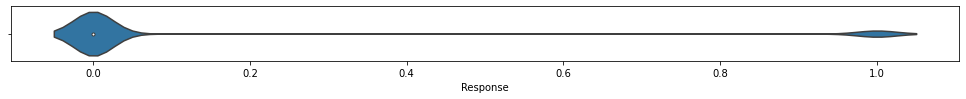

In [ ]:
# plotting the violinplot for each column
for column in numerical_col:
        plt.figure(figsize=(17,1))
        sns.violinplot(data=df, x=column)

Through the boxplot we can see that the annual premium columns has the outliers present inside that we have replace that we the mean or median 

In [ ]:
# Replace the outliers with the median value.
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
median = float(df['Annual_Premium'].median())
df= df[~((df['Annual_Premium'] < (Q1 - 1.5 * IQR)) |(df['Annual_Premium'] > (Q3 + 1.5 * IQR)))].replace(median)

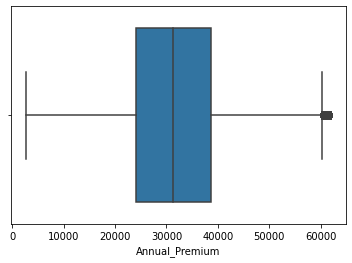

In [ ]:
# lets check again the outliers present in our Annual_Premium column
sns.boxplot(data=df,x='Annual_Premium')
plt.show()

In [ ]:
# lets seprate the numerical and catergorical features so we could do integer endcoding or onehot endcoding
numeric_data = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical features in the dataset are: \n')
print(numeric_data)
categorical_data = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('\nCategorical Features in the dataset are : \n')
print(categorical_data)

Numerical features in the dataset are: 

['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

Categorical Features in the dataset are : 

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [ ]:
# lets value counts Gender column
df.Gender.value_counts()

Male      200319
Female    170470
Name: Gender, dtype: int64

In [ ]:
# we are checking value counts for Vehicle_Damage
df.Vehicle_Damage.value_counts()

Yes    186561
No     184228
Name: Vehicle_Damage, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

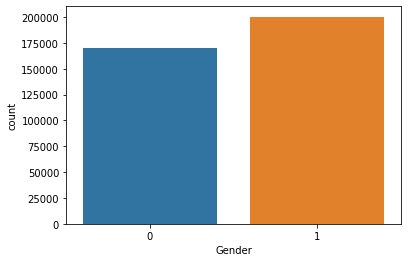

In [ ]:
# replace the values by binary encoding.
df['Gender'] = df['Gender'].apply(
    lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))
sns.countplot(df['Gender'])


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

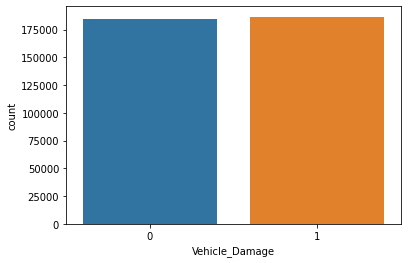

In [ ]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(
    lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))
sns.countplot(df['Vehicle_Damage'])

In [ ]:
# checking value count for vehicle age 
df.Vehicle_Age.value_counts()

1-2 Year     194212
< 1 Year     161547
> 2 Years     15030
Name: Vehicle_Age, dtype: int64

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

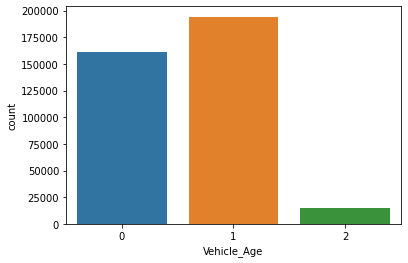

In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].apply(
    lambda x: 1 if x == '1-2 Year' else (0 if x == '< 1 Year' else 2))
sns.countplot(df['Vehicle_Age'])

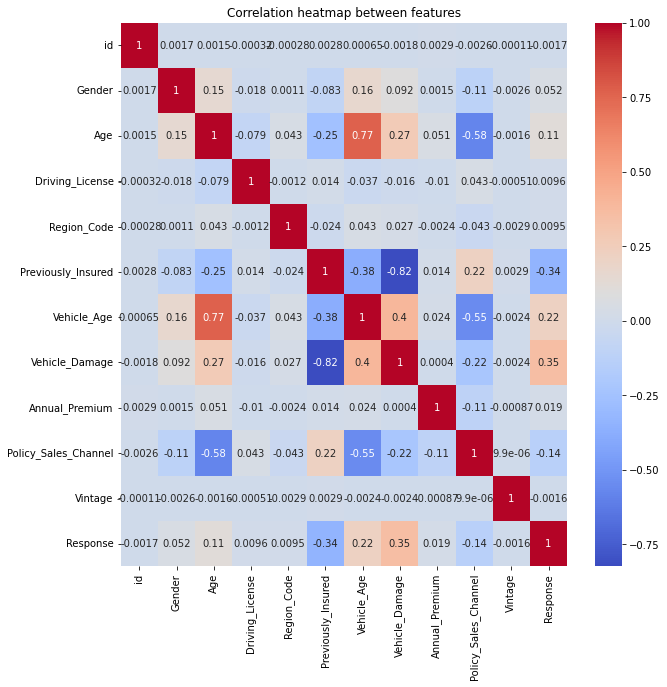

In [ ]:
#Plotting a correlation heatmap between features
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation heatmap between features')
plt.show()

We can see from above graph that the some of the feature are not impotant with repect the output variable such as 'Id', 'Vintage','previously insured'  this are impacting negatively on the predictiing output.

Text(0.5, 1.0, 'Feature importance according to information gain')

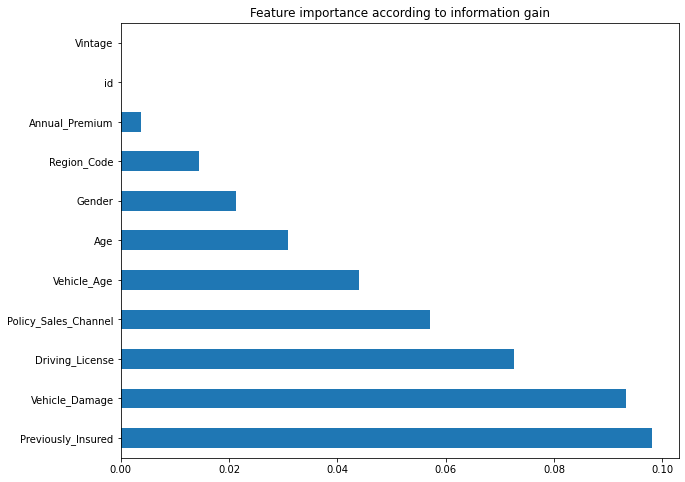

In [ ]:
# plotting the bar chart for all the information_gain
independent_numerical_features=[feature for feature in df.columns if feature not in ['Response']]
df_independent_numerical=df[independent_numerical_features]
y=df['Response']
importance=mutual_info_classif(df_independent_numerical,y)
feature_importance=pd.Series(importance,df_independent_numerical.columns)
feature_importance.sort_values(ascending=False,inplace=True,ignore_index=False)
plt.rcParams['figure.figsize']=(10,8)
feature_importance.plot(kind='barh')
plt.title('Feature importance according to information gain')

We can see from above graph that the contribution of feature like 'id ', 'vintage' ,' Annual premium '  and ' Region code '  is very less , so we could drop that columns  from the given set of features.

In [ ]:
# droping of the column in the dataset named as 'id ', 'vintage' ,' Annual premium ' and ' Region code ' 
df=df.drop(['id', 'Vintage','Region_Code','Annual_Premium'], axis=1)
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,1,44,1,0,2,1,26.0,1
1,1,76,1,0,1,0,26.0,0
2,1,47,1,0,2,1,26.0,1
3,1,21,1,1,0,0,152.0,0
4,0,29,1,1,0,0,152.0,0


In [ ]:
df[['Driving_License','Response']].value_counts()

Driving_License  Response
1                0           324911
                 1            45115
0                0              723
                 1               40
dtype: int64

In [ ]:
df.Driving_License.describe()

count    370789.000000
mean          0.997942
std           0.045316
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64

In [ ]:
df=df.drop('Driving_License',axis=1)

In [ ]:
df.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,1,44,0,2,1,26.0,1
1,1,76,0,1,0,26.0,0
2,1,47,0,2,1,26.0,1
3,1,21,1,0,0,152.0,0
4,0,29,1,0,0,152.0,0


### What all manipulations have you done and insights you found?

1] We have done the integer encoding to 3 categorical columns namely as 'Gender', 'Vehicle_Age', and 'Vehicle_Damage'.

2] We have detected the outliers in the dataset column and found that the Annual premium column has the outliers and we have replaced that with median.

3] We have drop some columns in the dataset which do not have much contribution towards predicting the class .

4] we have very inbalanced data in Driving liesense column with respect to Respose we have drop that column .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

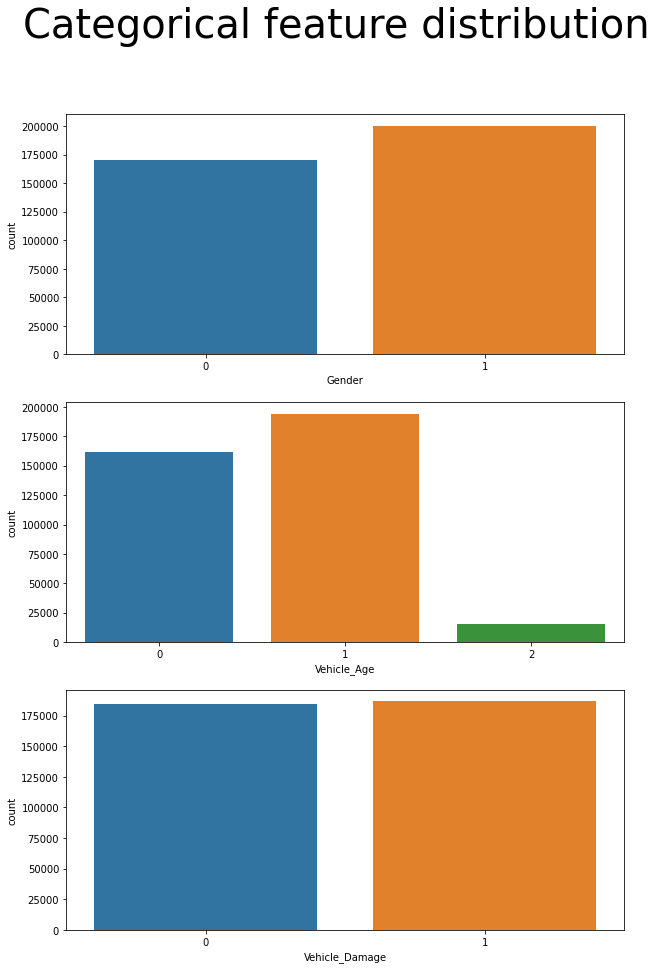

In [ ]:
# Chart - 1 visualization code
#Plotting categorical variable distribution
fig = plt.figure(figsize=(10,15))
plt.rcParams['figure.figsize']=(10,15)
for index,feature in enumerate (categorical_data):
  plt.subplot(len(categorical_data),1,index+1)
  sns.countplot(feature,data=df)
plt.suptitle('Categorical feature distribution',fontsize=40)
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
categorical_data

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

#### Chart - 2

Text(0.5, 1.0, 'Percentage distribution of values in the Gender column')

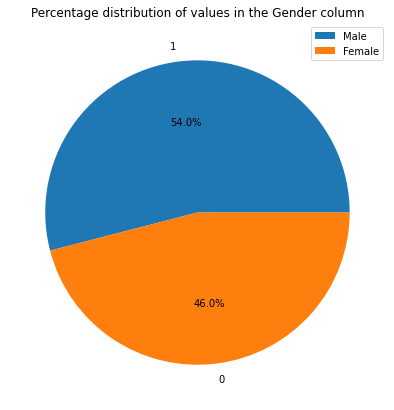

In [ ]:
# Chart - 2 visualization code
# 'Percentage distribution of values in the Gender column'
feature='Gender'
labels=df[feature].value_counts().index.tolist()
value_data=df[feature].value_counts().tolist()
plt.figure(figsize=(10,7))
plt.pie(value_data,labels=labels,autopct='%1.1f%%')
plt.show
lable_name=['Male','Female']
plt.legend(lable_name)
plt.title('Percentage distribution of values in the Gender column')


Text(0.5, 1.0, 'Percentage distribution of values in the "Vehicle_Age" column')

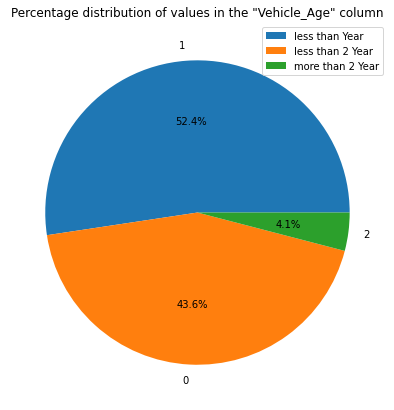

In [ ]:
# Chart - 2 visualization code for vehicle age column
# 'Percentage distribution of values in the "Vehicle_Age" column'
feature='Vehicle_Age'
labels=df[feature].value_counts().index.tolist()
value_data=df[feature].value_counts().tolist()
plt.figure(figsize=(10,7))
plt.pie(value_data,labels=labels,autopct='%1.1f%%')
lable_name=['less than Year','less than 2 Year','more than 2 Year']
plt.show
plt.legend(lable_name)
plt.title('Percentage distribution of values in the "Vehicle_Age" column')


Text(0.5, 1.0, 'Percentage distribution of values in the "Vehicle_Damage" column')

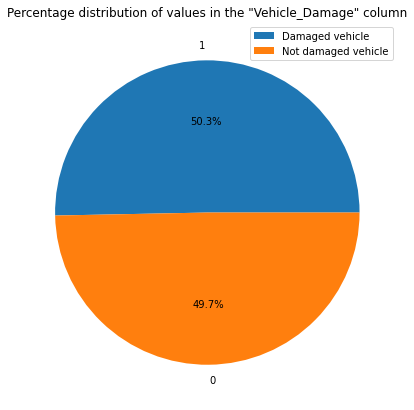

In [ ]:
# 'Percentage distribution of values in the "Vehicle_Damage" column'
feature='Vehicle_Damage'
labels=df[feature].value_counts().index.tolist()
value_data=df[feature].value_counts().tolist()
plt.figure(figsize=(10,7))
plt.pie(value_data,labels=labels,autopct='%1.1f%%')
lable_name=['Damaged vehicle ','Not damaged vehicle']
plt.show
plt.legend(lable_name)
plt.title('Percentage distribution of values in the "Vehicle_Damage" column')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
new_numeric_data= df.select_dtypes(include=[np.number]).columns.tolist()
new_numeric_data

['Gender',
 'Age',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'Response']

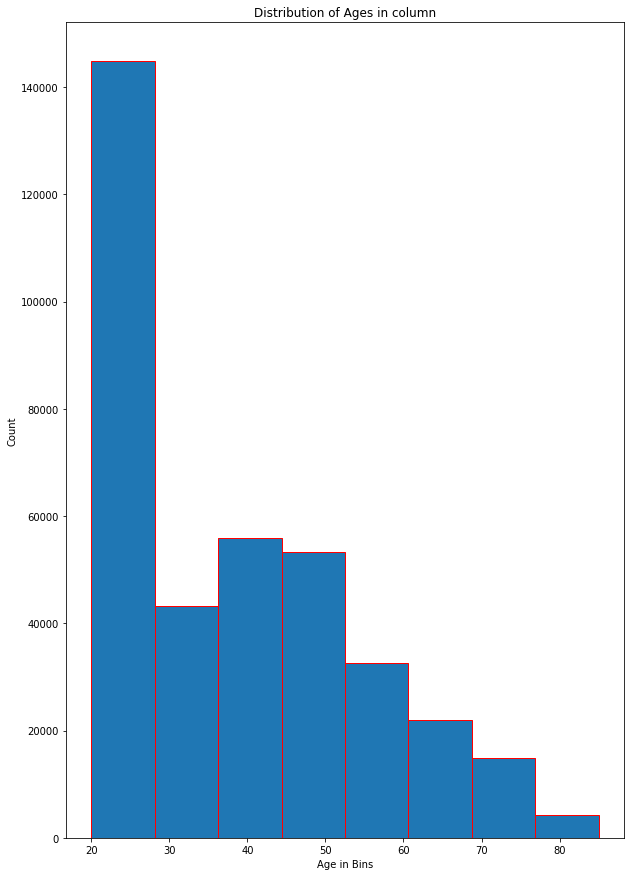

In [ ]:
plt.hist(df['Age'], edgecolor="red", bins=8)
plt.rcParams['figure.figsize'] = [4, 4]
plt.xlabel('Age in Bins') 
plt.ylabel('Count') 
# displaying the title
plt.title("Distribution of Ages in column")
plt.show() 


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 0.98, 'Distribution of values in the Policy_Sales_Channel ')

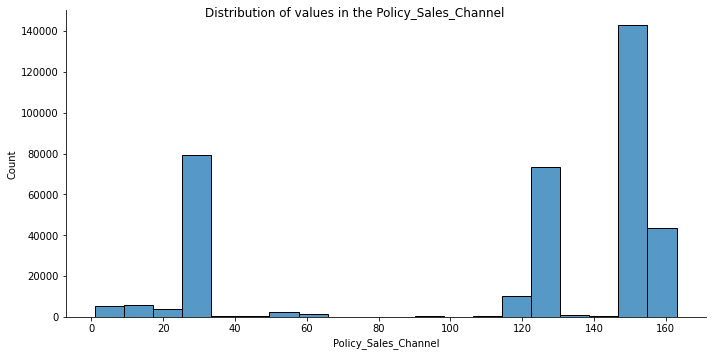

In [ ]:
# Chart - 4 visualization code
plot=sns.displot(df, x="Policy_Sales_Channel", bins=20,aspect=2)
plot.fig.suptitle('Distribution of values in the Policy_Sales_Channel ')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
df[['Gender','Response']].value_counts()

Gender  Response
1       0           172763
0       0           152871
1       1            27556
0       1            17599
dtype: int64

Text(0.5, 0, 'Response')

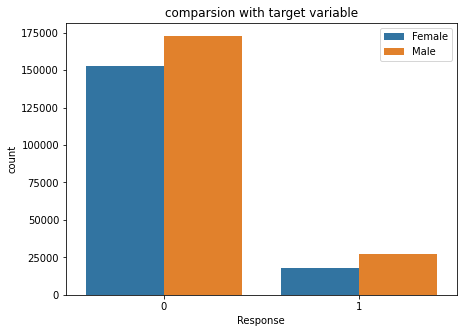

In [ ]:
# Chart - 5 visualization code
plt.subplots(figsize=(7,5))
sns.countplot(x='Response', hue='Gender',  data=df);
plt.title('comparsion with target variable')
plt.ylabel('count')
plt.legend(['Female','Male'])
plt.xlabel('Response')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 0, 'Response')

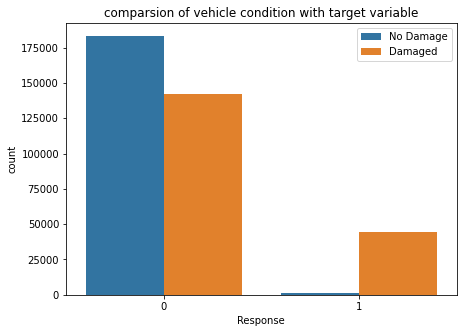

In [ ]:
# Chart - 6 visualization code
plt.subplots(figsize=(7,5))
sns.countplot(x='Response', hue='Vehicle_Damage',  data=df);
plt.title('comparsion of vehicle condition with target variable')
plt.ylabel('count')
plt.legend(['No Damage','Damaged'])
plt.xlabel('Response')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

Text(0.5, 0, 'Response')

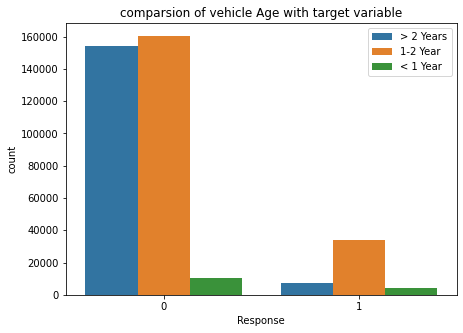

In [ ]:
# Chart - 7 visualization code
plt.subplots(figsize=(7,5))
sns.countplot(x='Response', hue='Vehicle_Age',  data=df);
plt.title('comparsion of vehicle Age with target variable')
plt.ylabel('count')
plt.legend(['> 2 Years', '1-2 Year' ,'< 1 Year'])
plt.xlabel('Response')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
policychannel_df = df.loc[df['Response'] ==1] 
(policychannel_df[['Policy_Sales_Channel']].value_counts().sort_values(ascending=False)[:10])

In [ ]:
(policychannel_df[['Policy_Sales_Channel']].value_counts().sort_values(ascending=False)[:10])
pc_df=pd.DataFrame(data = {'policy_channels':['26.0','124.0','152.0','156.0','157.0','122.0','154.0','163.0','160.0','155.0'],
        'conversion':[15083,13638, 3801,2278,1780,1605,1453,867,471,388]} )
pc_df

,policy_channels,conversion
0,26.0,15083
1,124.0,13638
2,152.0,3801
3,156.0,2278
4,157.0,1780
5,122.0,1605
6,154.0,1453
7,163.0,867
8,160.0,471
9,155.0,388


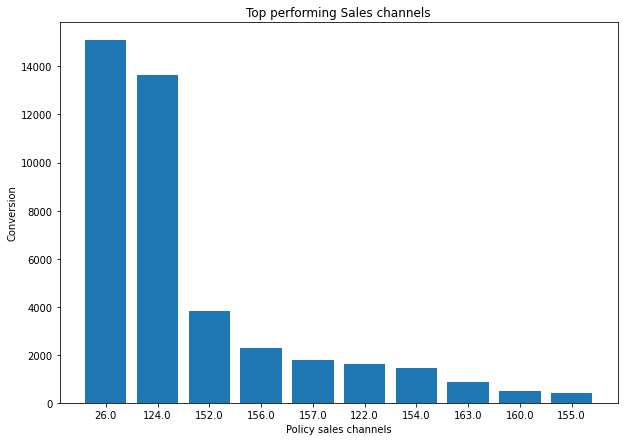

In [ ]:

fig = plt.figure(figsize =(10, 7))
# Horizontal Bar Plot
plt.bar(pc_df['policy_channels'], pc_df['conversion'])
plt.title('Top performing Sales channels')
plt.ylabel('Conversion')
plt.xlabel('Policy sales channels')
# Show Plot
plt.show()

In [ ]:
df.Response.value_counts()

0    325634
1     45155
Name: Response, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Check for correlation among numerical variables
corr = df.corr()
corr

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
Gender,1.000000,0.147232,-0.082803,0.162184,0.092281,-0.112103,0.052305
Age,0.147232,1.000000,-0.253794,0.766782,0.266429,-0.576846,0.110938
Previously_Insured,-0.082803,-0.253794,1.000000,-0.379233,-0.823411,0.217038,-0.340913
Vehicle_Age,0.162184,0.766782,-0.379233,1.000000,0.395312,-0.548831,0.220587
Vehicle_Damage,0.092281,0.266429,-0.823411,0.395312,1.000000,-0.221651,0.354096
Policy_Sales_Channel,-0.112103,-0.576846,0.217038,-0.548831,-0.221651,1.000000,-0.136805
Response,0.052305,0.110938,-0.340913,0.220587,0.354096,-0.136805,1.000000


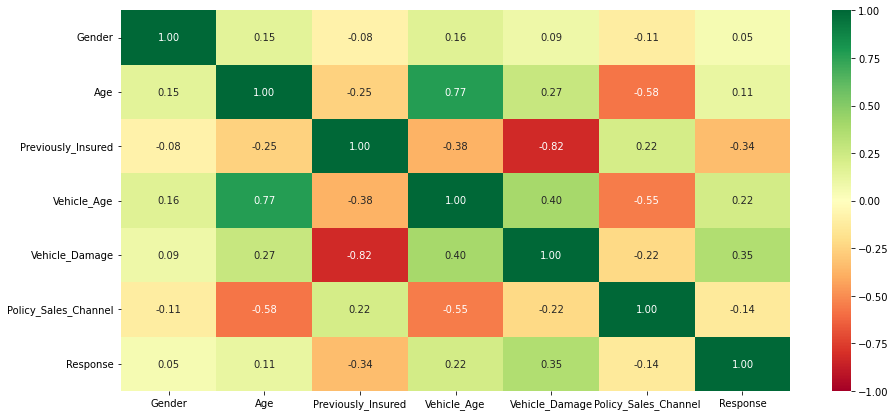

In [ ]:
# Chart - 9 visualization code
# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdYlGn") # Spectral
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

Text(0.5, 0.98, 'Pairplot of the given features')

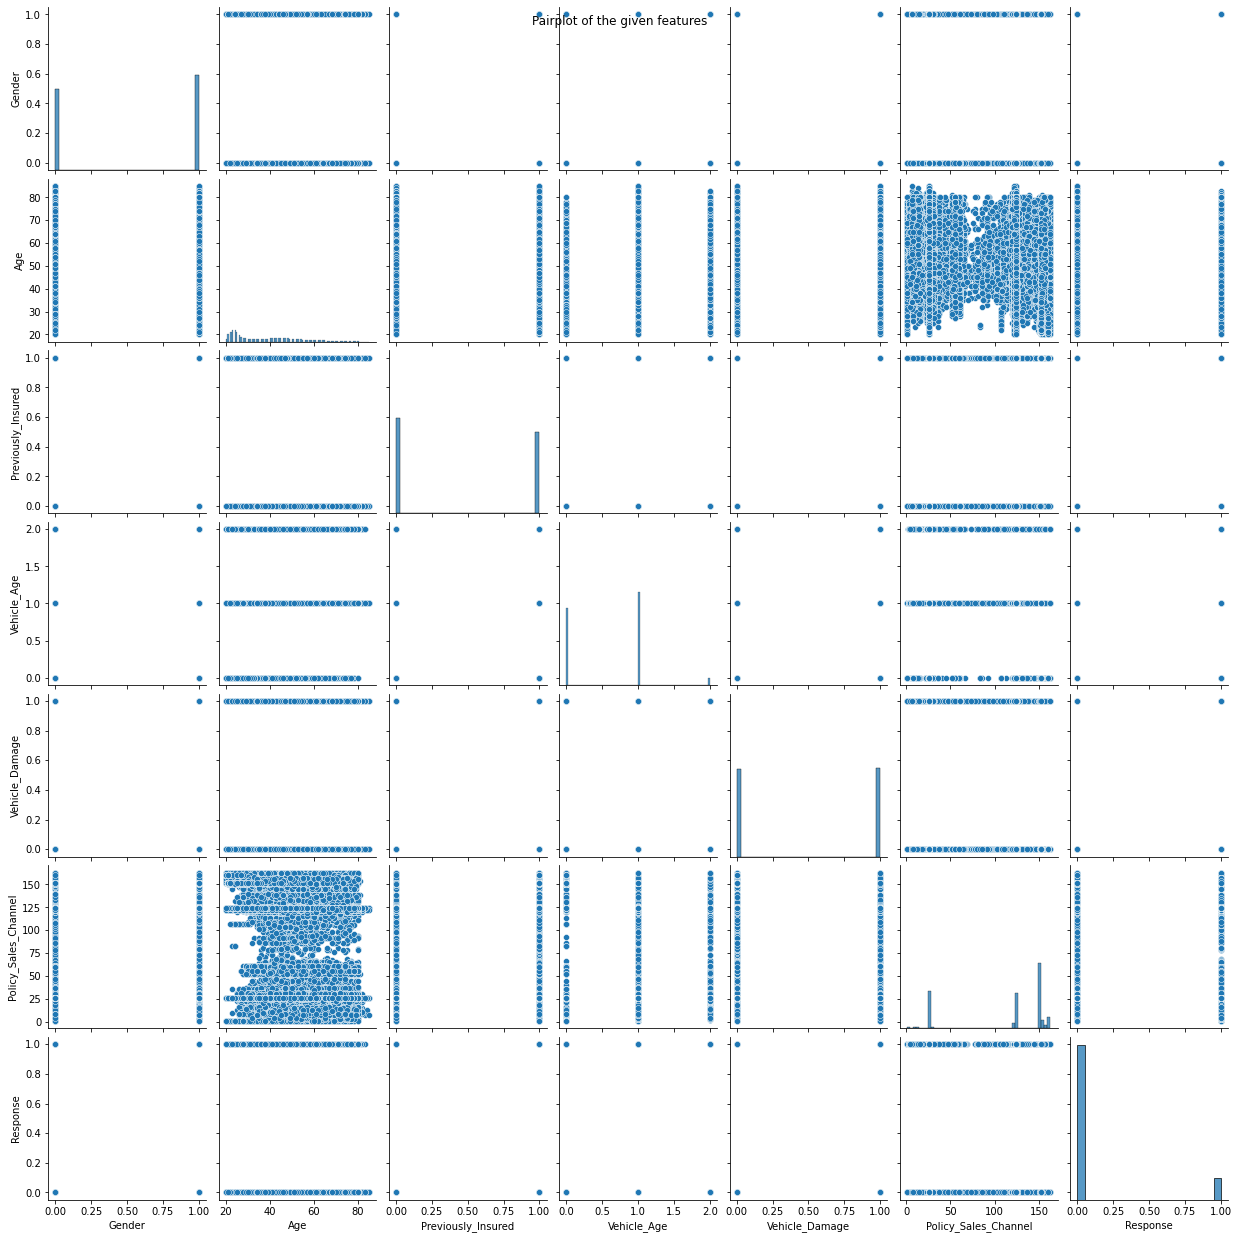

In [ ]:
# lets plot the pairplot to plot pairwise relationships between variables within a dataset. 
g = sns.pairplot(df)
g.fig.suptitle("Pairplot of the given features")


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***